# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

5340a229ef485d5090db2fdbb0fddf1a


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}") 

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

Number of cities in the list: 618


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?id=2172797&appid=" + weather_api_key
print(requests.get(url))
# Pretty Print the output of the JSON
response = requests.get(url)
data = response.json()
pprint(data)

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -16.9167, 'lon': 145.7667},
 'dt': 1690559025,
 'id': 2172797,
 'main': {'feels_like': 293.32,
          'humidity': 83,
          'pressure': 1018,
          'temp': 293.1,
          'temp_max': 293.12,
          'temp_min': 291.07},
 'name': 'Cairns',
 'sys': {'country': 'AU',
         'id': 9490,
         'sunrise': 1690577013,
         'sunset': 1690617784,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'light intensity drizzle',
              'icon': '09n',
              'id': 300,
              'main': 'Drizzle'}],
 'wind': {'deg': 150, 'speed': 4.12}}


In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q=+{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to increment the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | mirabad
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 7 of Set 1 | eydhafushi
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | mataura
City not found. Skipping...
Processing Record 12 of Set 1 | chivay
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | nantucket
Processing Record 16 of Set 1 | adre
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | ambilobe
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Convert temperature from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Round the temperatures two decimal places
city_data_df['Max Temp'] = city_data_df['Max Temp'].round(2)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,10.09,76,13,1.17,GL,1690559025
1,esperance,-33.8667,121.9000,13.68,74,6,9.18,AU,1690559026
2,mirabad,30.4362,61.8383,39.74,10,0,8.36,AF,1690559026
3,rikitea,-23.1203,-134.9692,21.81,70,95,8.16,PF,1690559026
4,kapaa,22.0752,-159.3190,27.18,85,75,5.14,US,1690559026


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,10.09,76,13,1.17,GL,1690559025
1,esperance,-33.8667,121.9000,13.68,74,6,9.18,AU,1690559026
2,mirabad,30.4362,61.8383,39.74,10,0,8.36,AF,1690559026
3,rikitea,-23.1203,-134.9692,21.81,70,95,8.16,PF,1690559026
4,kapaa,22.0752,-159.3190,27.18,85,75,5.14,US,1690559026


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

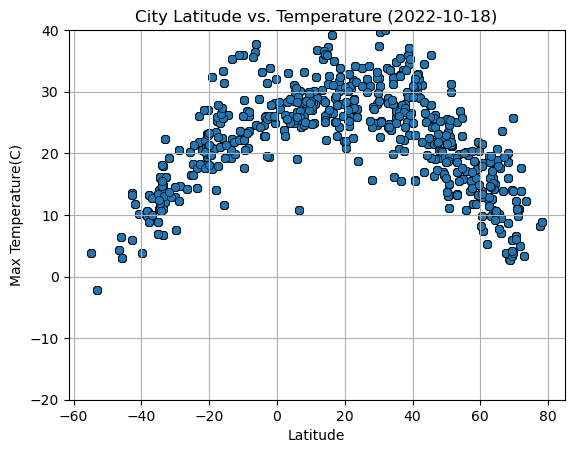

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = [city_data_df['Lat']for data in city_data_df]
y_values = [city_data_df['Max Temp']for data in city_data_df]
plt.scatter(x_values,y_values,edgecolors='black',linewidths=0.5)
plt.title('City Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')


# Set the y-axis limits from -20 to 40 in increments of 10
plt.ylim(-20, 40)

# Add gridlines to the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity 

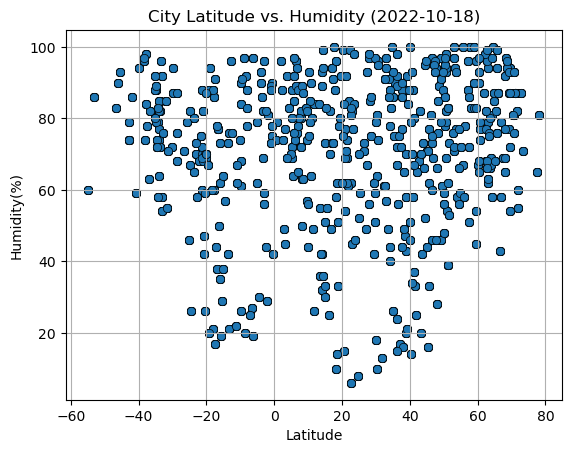

In [10]:
# Build scatter plot for latitude vs. humidity
x_values = [city_data_df['Lat']for data in city_data_df]
y_values = [city_data_df['Humidity']for data in city_data_df]
plt.scatter(x_values,y_values,edgecolors='black',linewidths=0.5)
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')


# # Set the y-axis limits from -20 to 40 in increments of 10
# plt.ylim(-20, 40)

# Add gridlines to the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# # Show plot
plt.show()

#### Latitude Vs. Cloudiness

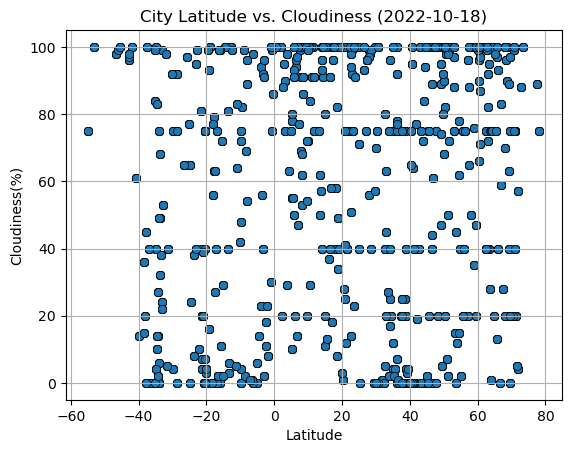

In [11]:
# Build scatter plot for latitude vs. cloudiness
x_values = [city_data_df['Lat']for data in city_data_df]
y_values = [city_data_df['Cloudiness']for data in city_data_df]
plt.scatter(x_values,y_values,edgecolors='black',linewidths=0.5)
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Add gridlines to the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# # Show plot
plt.show()

#### Latitude Vs. Wind Speed

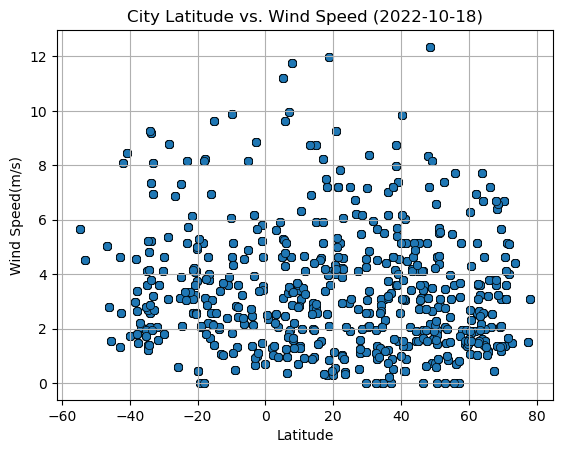

In [12]:
# Build scatter plot for latitude vs. wind speed
x_values = [city_data_df['Lat']for data in city_data_df]
y_values = [city_data_df['Wind Speed']for data in city_data_df]
plt.scatter(x_values,y_values,edgecolors='black',linewidths=0.5)
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Add gridlines to the plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# # Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Create the line equation.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (slope, intercept, line_eq)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,10.09,76,13,1.17,GL,1690559025
2,mirabad,30.4362,61.8383,39.74,10,0,8.36,AF,1690559026
4,kapaa,22.0752,-159.3190,27.18,85,75,5.14,US,1690559026
5,eydhafushi,5.1033,73.0708,28.53,72,10,3.11,MV,1690559028
8,barrow,71.2906,-156.7887,11.01,87,20,5.14,US,1690559029


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,esperance,-33.8667,121.9000,13.68,74,6,9.18,AU,1690559026
3,rikitea,-23.1203,-134.9692,21.81,70,95,8.16,PF,1690559026
6,atuona,-9.8000,-139.0333,26.10,68,72,9.90,PF,1690559028
7,yulara,-25.2406,130.9889,16.40,46,77,3.11,AU,1690559028
9,chivay,-15.6383,-71.6011,11.56,19,11,2.17,PE,1690559032


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.48257413943602645


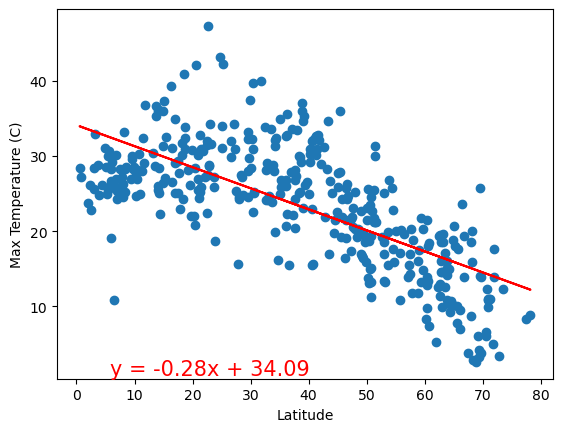

In [35]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.682974789484813


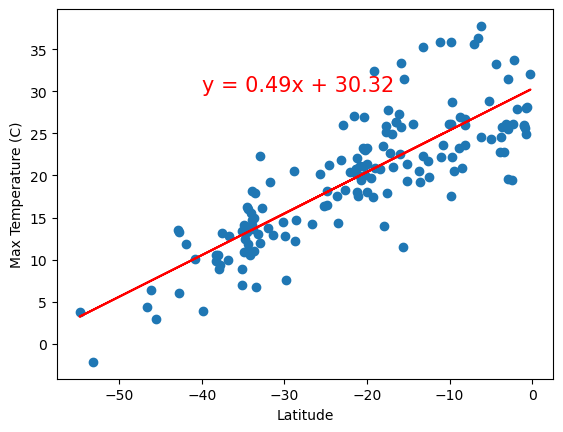

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a moderate negative correlation between latitude and temperature. In the Southern Hemisphere, however, there is a strong positive correlation between latitude and temperature

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.016001075234488762


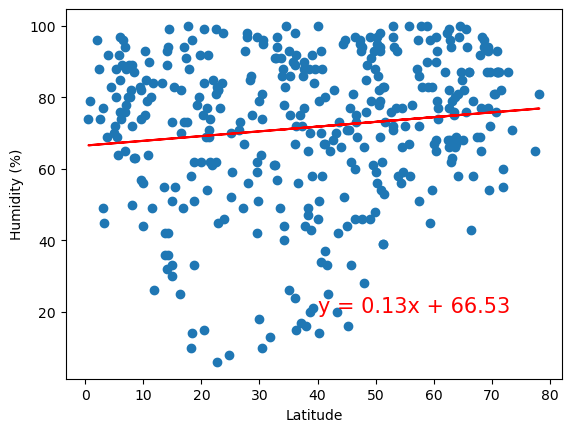

In [40]:
#Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0616943949406476


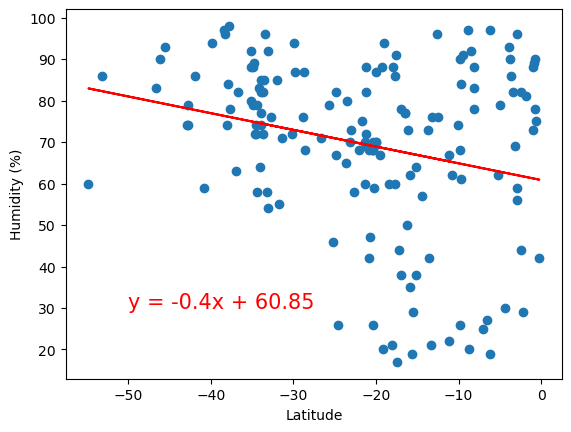

In [42]:
#Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between latitude and humidity. In the Southern Hemisphere, however, there is a weak negative correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0012932027832525711


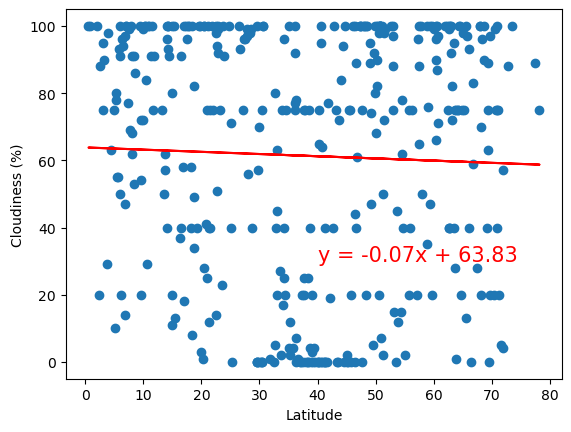

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0015101704751490468


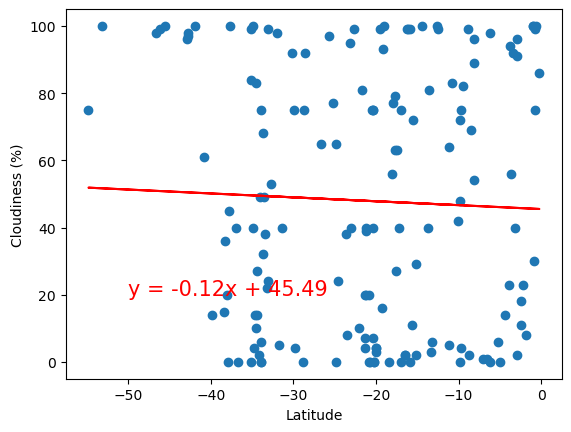

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both Northern and Southern Hemispheres, there is a very weak negative correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009626244026409186


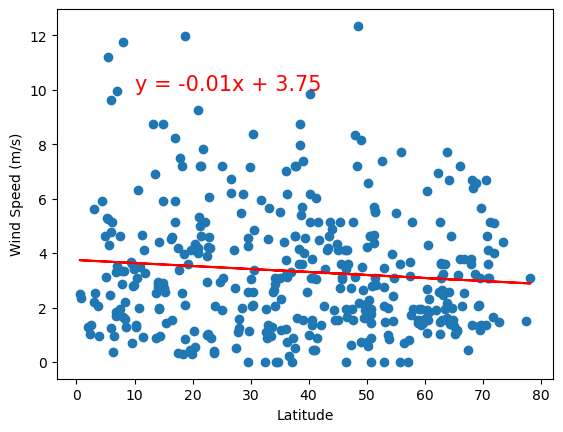

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006423349852146534


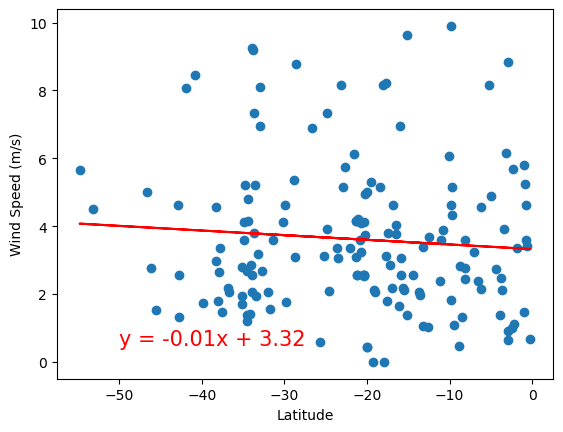

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,0.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both Northern and Southern Hemispheres, there is a very weak negative correlation between latitude and wind speed.